결정 트리는 분류와 회귀 작업 그리고 다중 출력 작업도 가능한 머신러닝 알고리즘이다.


그 중에서 CART 훈련 알고리즘을 예시로 들어서 설명해보겠습니다!

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:,2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#환경 설정
import numpy as np
import os
#matplotlib 설치
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#한글 출력
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file=image_path("iris_tree.dot"),
    #out_file="C:/Users/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
# 설치 후 다시 실행해 보겠습니다

FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\decision_trees\\iris_tree.dot'

In [33]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [21]:
import graphviz
with open("images/decision_trees/iris_tree.dot") as f:
    dot_graph = f.read()
    dot = graphviz.Source(dot_graph)
    dot.format = 'png'
    dot.render(filename='iris_tree', directory='images/decision_trees', cleanup=True)
dot
#데이터 시각화 부분입니다. 이전 단원을 보고 다시 설명하겠습니다.

FileNotFoundError: [Errno 2] No such file or directory: 'images/decision_trees/iris_tree.dot'

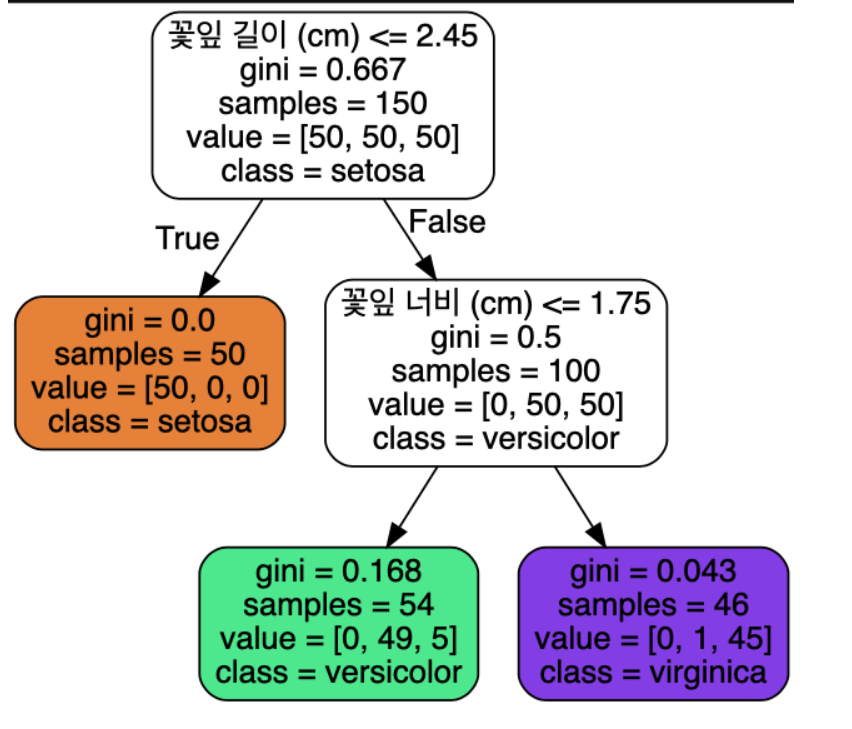

In [30]:
#시각화를 하고 나면 생기는 그림
from PIL import Image
im = Image.open('C:/Users/com/Desktop/image_iris.png')
im

In [35]:
#예측하기

# 루트노드는 깊이가 0인 맨 꼭대기의 노드
# 리프노드는 자식노드를 가지지 않는 노드

# 불순도를 측정해야 하는데 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드는 
# 순수하다고 합니다.

# sklearn에선 이진 트리만 만드는 CART 알고리즘을 사용합니다.

# 모델 해석: 화이트박스와 블랙 박스
# 화이트박스모델(ex. 결정 트리) : 예측할 때, 어떻게 예측되었는지 확인 가능
# 블랙박스모델(ex. 랜덤포레스트나 신경망) : 예측할 때, 어떻게 예측되었는지 확인 불가능

In [38]:
tree_clf.predict_proba([[5,1.5]])
# iris-Setosa 는 0% iris-Versicolor는 90.7% iris-Virginica는 9.3%입니다.

array([[0.        , 0.90740741, 0.09259259]])

In [40]:
tree_clf.predict([[5, 1.5]])
#iris-Versicolor는 90.7% 이므로 예측 성공

array([1])

In [42]:
# sklearn에선 결정트리를 훈련하기 위해 CART 알고리즘을 사용합니다.
# CART 알고리즘은 탐욕적 알고리즘입니다.
# 최적의 트리를 찾는 것은 NP-완전 문제로 알려져 있습니다.
# 먼저 훈련 세트를 하나의 특성 k의 임곗값 t-k를 사용해서 두개의 서브셋으로 나눕니다.
# 이 과정을 찾기 전에 이 자료구조는 tree를 이루고 있으므로 O(n*m*log(m))입니다.

In [43]:
# 불순도(ex.지니 계수)는 엔트로피와 연관이 되어 있습니다. 
# 엔트로피는 메세지의 평균 정보량을 측정하는 섀넌의 정보이론도 포함됩니다.
# 그렇다면 엔트로피를 사용해야 하나? 아님 지니 계수를 사용해야 하나?
# 둘다 비슷하나 지니 불순도가 조금 더 계산이 빠르고
# 하지만 다른 트리를 만들려고 할 때, 지니 불순도가 가장 빈도가 높은 클래스를 
# 한쪽으로 고립시키려는 경향이 있고, 엔트로피는 조금 더 균형 잡힌 트리를 만들어줍니다.

In [44]:
#6.7부터 다시 시작
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)
#시각화도 다시 해보기

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')